In [1]:
import numpy as np
import pandas as pd

# Chargement du fichier et affichage des 10 premières lignes

In [2]:
data = pd.read_csv('hubble_data.csv')
data.iloc[:10]

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


In [3]:
data.describe()

,distance,recession_velocity
count,24.000000,24.000000
mean,0.911375,373.125000
std,0.645496,371.254666
min,0.032000,-220.000000
25%,0.406250,165.000000
50%,0.900000,295.000000
75%,1.175000,537.500000
max,2.000000,1090.000000


# Affichage simple des données

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.titlesize': 20})

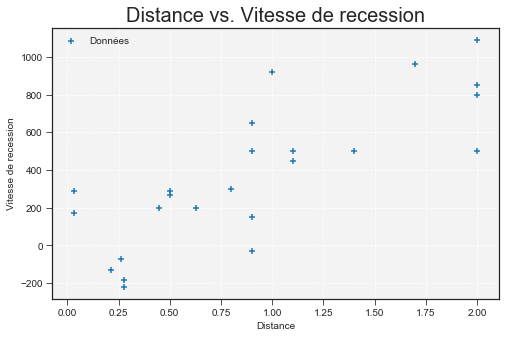

In [5]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(facecolor='#f3f3f3')

plt.grid(color='w', linestyle='dashed')
plt.scatter(data['distance'], data['recession_velocity'], marker = '+', label='Données')
plt.title("Distance vs. Vitesse de recession")
plt.axis('tight')
plt.legend(loc='best')

ax = ax.set(xlabel='Distance', ylabel='Vitesse de recession')

# Calcul de la régression

In [6]:
from sklearn import linear_model

# pour les features, on conserve toutes les variables sauf la velocite
X = data.drop('recession_velocity', axis = 1)
# pour la target/variable à prédire, on prend uniquement la velocite
y = data['recession_velocity']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Coefficients: \n', regr.coef_)

# permet de dessiner la ligne prédite par la régression pour les features
y_pred = regr.predict(X)

Coefficients: 
 [454.15844092]


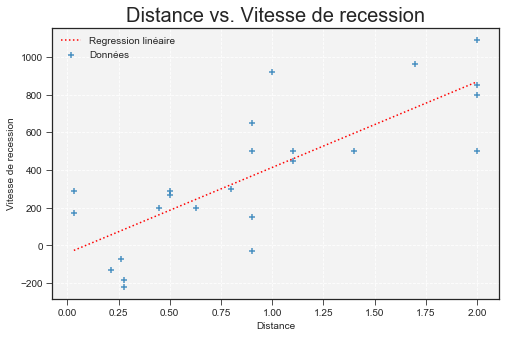

In [7]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(facecolor='#f3f3f3')

plt.grid(color='w', linestyle='dashed')
plt.scatter(data['distance'], data['recession_velocity'], alpha = .8, marker = '+', label='Données')
plt.plot(data['distance'], y_pred, color='red', linestyle='dotted', label='Regression linéaire')

plt.title("Distance vs. Vitesse de recession")
plt.legend(loc='best')

ax = ax.set(xlabel='Distance', ylabel='Vitesse de recession')
